In [32]:
# Importando bibliotecas necessárias
import pandas as pd
# pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

# Ler e carregar a base de dados
arquivo = 'insurance.csv'
insurance_df = pd.read_csv(arquivo)

# Examinar a base de dados
linhas, colunas = insurance_df.shape # Extrair tamanho da base de dados
print('A base de dados possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário
insurance_df.columns = ['Idade', 'Sexo', 'BMI', 'Crianças', 'Fumante', 'Região', 'Cobranças'] # Renomear colunas
insurance_df.head(10) # Visualizar as 10 primeiras linhas da base de dados
# BMI - Body Mass Index

A base de dados possui 1338 linhas e 7 colunas.


,Idade,Sexo,BMI,Crianças,Fumante,Região,Cobranças
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


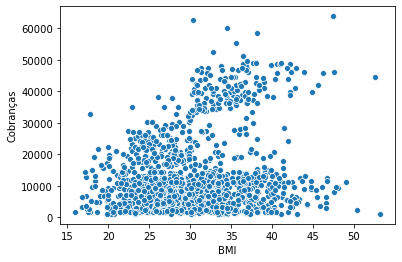

In [42]:
sns.scatterplot(x = insurance_df['BMI'], y = insurance_df['Cobranças']); # Gráfico de dispersão

O gráfico de dispersão acima sugere que o BMI (Body Mass Index) e os encargos de seguro estão positivamente correlacionados, onde os clientes com BMI mais alto também tendem a pagar mais em custos de seguro. Esse padrão faz sentido, uma vez que o IMC elevado está normalmente associado a um maior risco de doenças crônicas.

Para verificar a força dessa relação, você pode adicionar uma linha de regressão ou a linha que melhor se ajusta aos dados. Fazemos isso alterando o comando para `sns.regplot`.

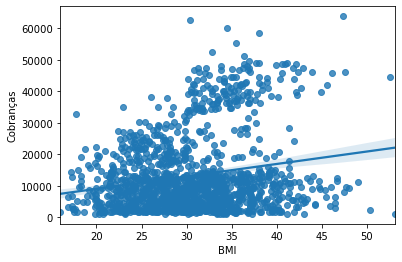

In [41]:
sns.regplot(x = insurance_df['BMI'], y = insurance_df['Cobranças']); # Gráfico de regressão linear

### Gráficos de Dispersão Codificados por Cores

Podemos usar gráficos de dispersão para exibir as relações entre não duas, mas três variáveis. Uma maneira de fazer isso é codificar os pontos por cores.

Por exemplo, para entender como o fumo afeta a relação entre o BMI e os custos do seguro, podemos codificar os pontos por cores como `'Fumante'` e traçar as outras duas colunas (`'BMI'`, `'Cobranças'`) em os machados.

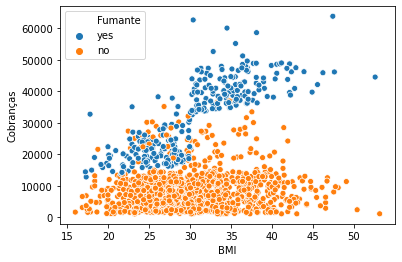

In [40]:
sns.scatterplot(x = insurance_df['BMI'], y = insurance_df['Cobranças'], hue = insurance_df['Fumante']);

Esse gráfico de dispersão mostra que, enquanto os não fumantes tendem a pagar um pouco mais com o aumento do BMI, os fumantes pagam MUITO mais.

Para enfatizar ainda mais esse fato, podemos usar o comando `sns.lmplot` para adicionar duas linhas de regressão, correspondendo a fumantes e não fumantes. Você notará que a linha de regressão para fumantes tem uma inclinação muito mais acentuada em relação à linha de não fumantes.

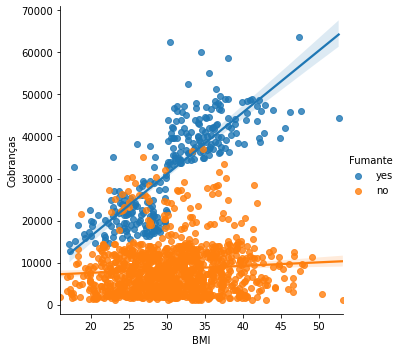

In [39]:
sns.lmplot(x = 'BMI', y = 'Cobranças', hue = 'Fumante', data = insurance_df);

O comando `sns.lmplot` acima funciona de maneira um pouco diferente dos comandos que você aprendeu até agora:
- Em vez de definir `x = insurance_df ['BMI']` para selecionar a coluna `'BMI'` em` insurance_df`, definimos `x = "BMI"` para especificar apenas o nome da coluna.
- Da mesma forma, `y = 'Cobranças'` e `hue = 'Fumante'` também contêm os nomes das colunas.
- Especificamos o conjunto de dados com `data = insurance_df`.

Finalmente, há mais um gráfico sobre o qual você aprenderá, que pode ser ligeiramente diferente de como você está acostumado a ver gráficos de dispersão. Normalmente, usamos gráficos de dispersão para destacar a relação entre duas variáveis contínuas (como `'BMI'` e `'Cobranças'`). No entanto, podemos adaptar o design do gráfico de dispersão para apresentar uma variável categórica (como `'Fumante'`) em um dos eixos principais. Iremos nos referir a este tipo de gráfico como um gráfico de dispersão categórico, e o construímos com o comando `sns.swarmplot`.

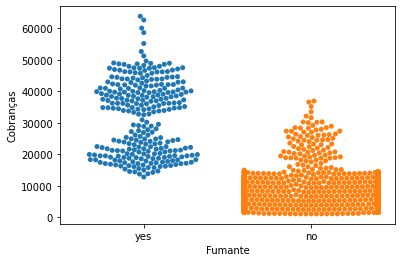

In [45]:
sns.swarmplot(x = insurance_df['Fumante'], y = insurance_df['Cobranças']);

Entre outras coisas, o gráfico acima nos mostra que:
- Em média, os não fumantes pagam menos do que os fumantes, e
- Os clientes que mais pagam são fumantes; enquanto os clientes que pagam menos são não fumantes.